In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

questions to ask about UFO:
-what is the most common ufo shape?
-number of sightings over the years?
-number of sights per country?
-number of of sights per state?
-what is the most popular time to see a UFO?

In [8]:
import warnings
import pandas as pd

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Suppress the SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # or "raise" to raise an exception

# Filter out other warnings if needed
warnings.filterwarnings("ignore")

In [9]:
file = "scrubbed.csv"
ufo = pd.read_csv(file, ",")
ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [10]:
ufo.shape

(80332, 11)

In [11]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [12]:
# split datetime column into date and time columns

# Replace '24:00' with '00:00' in the datetime column
ufo['datetime'] = ufo['datetime'].str.replace('24:00', '00:00')

# Convert the 'datetime' column to datetime type
ufo['datetime'] = pd.to_datetime(ufo['datetime'])

# Split the datetime column into separate date and time columns
ufo['date'] = ufo['datetime'].dt.date
ufo['time'] = ufo['datetime'].dt.time

# Print the modified dataframe
ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10,20:30:00
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949-10-10,21:00:00
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955-10-10,17:00:00
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10,21:00:00
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10,20:00:00


In [13]:
# create "duration (minutes)" and "duration (hours)" columns
ufo['duration (minutes)'] = np.nan
ufo['duration (hours)'] = np.nan
for i in range(len(ufo['duration (seconds)'])):
    try:
        ufo['duration (minutes)'].iloc[i] = float(ufo['duration (seconds)'].iloc[i]) / 60
        ufo['duration (hours)'].iloc[i] = float(ufo['duration (seconds)'].iloc[i]) / 3600
    except:
        # Remove all characters except numbers and dots
        ufo['duration (seconds)'].iloc[i] = re.sub(r"[^0-9.]", "", ufo['duration (seconds)'].iloc[i])
        ufo['duration (minutes)'].iloc[i] = float(ufo['duration (seconds)'].iloc[i]) / 60
        ufo['duration (hours)'].iloc[i] = float(ufo['duration (seconds)'].iloc[i]) / 3600

In [14]:
ufo.head()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,duration (minutes),duration (hours)
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10,20:30:00,45.000000,0.750000
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949-10-10,21:00:00,120.000000,2.000000
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955-10-10,17:00:00,0.333333,0.005556
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10,21:00:00,0.333333,0.005556
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10,20:00:00,15.000000,0.250000


In [15]:
duplicates = ufo.duplicated()

# print the number of duplicate rows
print('Number of duplicate rows:', duplicates.sum())

# remove duplicate rows
ufo.drop_duplicates(inplace=True)
duplicates = ufo.duplicated()
ufo.index = np.arange(0, len(ufo))
print('Number of duplicate rows:', ufo.duplicated().sum())

Number of duplicate rows: 0
Number of duplicate rows: 0


In [16]:
missing = pd.DataFrame({'null': ufo.isnull().sum()})
print(missing.head(ufo.shape[1]))

                      null
datetime                 0
city                     0
state                 5797
country               9670
shape                 1932
duration (seconds)       0
duration (hours/min)     0
comments                15
date posted              0
latitude                 0
longitude                0
date                     0
time                     0
duration (minutes)       0
duration (hours)         0


In [17]:
non_missing_shape_index = ufo['shape'].dropna(inplace=False).index
ufo = ufo.iloc[non_missing_shape_index]

In [18]:
print(ufo.isnull().sum())

datetime                   0
city                       0
state                   5658
country                 9399
shape                      0
duration (seconds)         0
duration (hours/min)       0
comments                   8
date posted                0
latitude                   0
longitude                  0
date                       0
time                       0
duration (minutes)         0
duration (hours)           0
dtype: int64


In [19]:
ufo.index = np.arange(0, len(ufo))

In [20]:
ufo['comments'].fillna('no comment', inplace=True)
ufo['comments'].isnull().sum()

0

In [22]:
ufo['state'].fillna('unknown', inplace=True)
ufo['state'].isnull().sum()

0

In [23]:
ufo['country'].fillna('unknown', inplace=True)
ufo['country'].isnull().sum()

0

In [24]:
print(ufo.isnull().sum())

datetime                0
city                    0
state                   0
country                 0
shape                   0
duration (seconds)      0
duration (hours/min)    0
comments                0
date posted             0
latitude                0
longitude               0
date                    0
time                    0
duration (minutes)      0
duration (hours)        0
dtype: int64


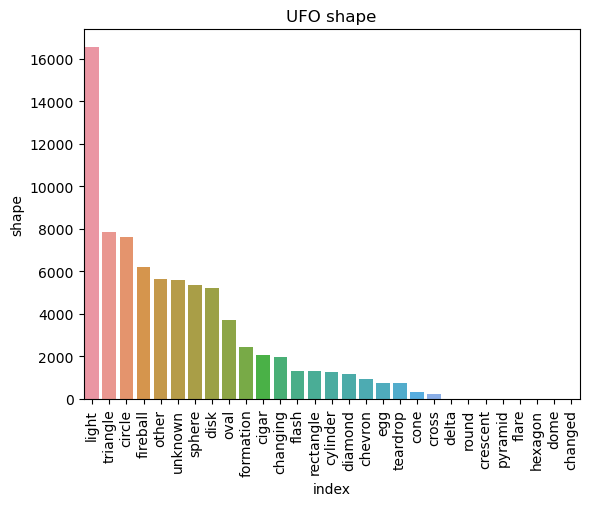

In [25]:
appear = pd.DataFrame(ufo['shape'].value_counts()).reset_index()
plt.xticks(rotation = 90)
ax = sns.barplot(x="index", y="shape", data=appear).set(title='UFO shape')

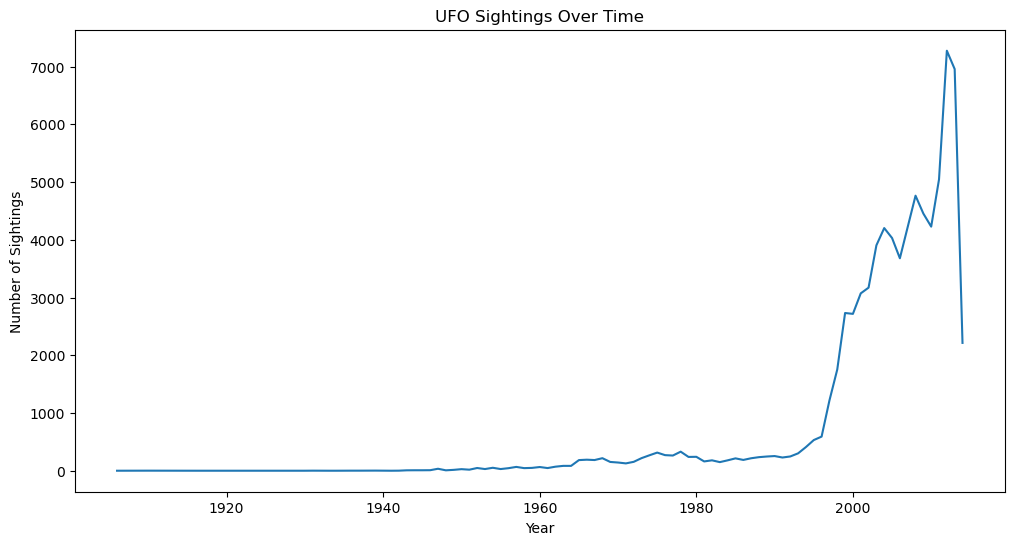

In [26]:
import numpy as np

# Line Plot: Number of Sightings Over Time
plt.figure(figsize=(12, 6))
sightings_over_time = ufo['datetime'].dt.year.value_counts().sort_index()
sns.lineplot(x=sightings_over_time.index, y=sightings_over_time.values)
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.title('UFO Sightings Over Time')
plt.show()

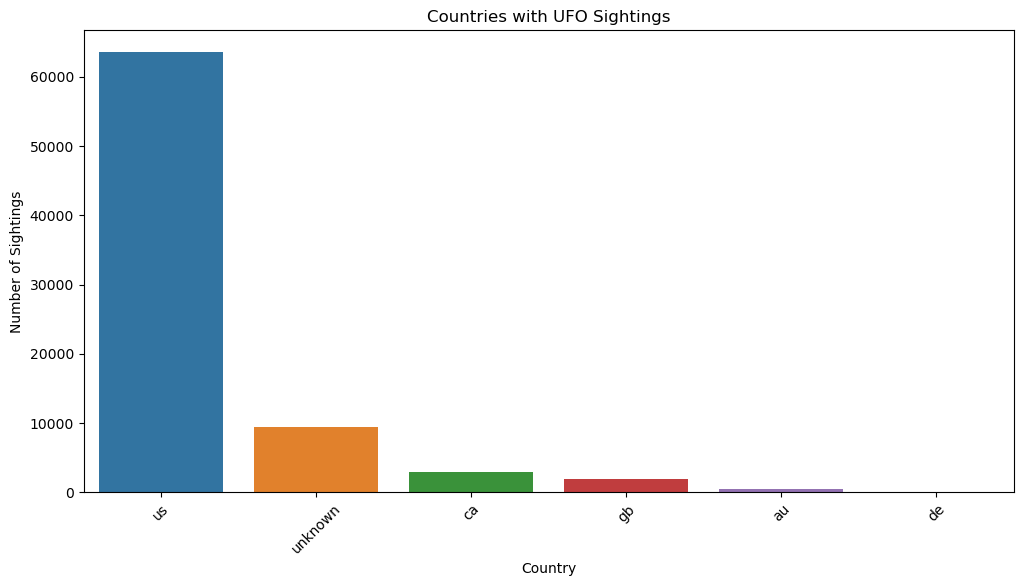

In [28]:
plt.figure(figsize=(12, 6))
sightings_by_country = ufo['country'].value_counts()
sns.barplot(x=sightings_by_country.index, y=sightings_by_country.values)
plt.xlabel('Country')
plt.ylabel('Number of Sightings')
plt.title('Countries with UFO Sightings')
plt.xticks(rotation=45)
plt.show()

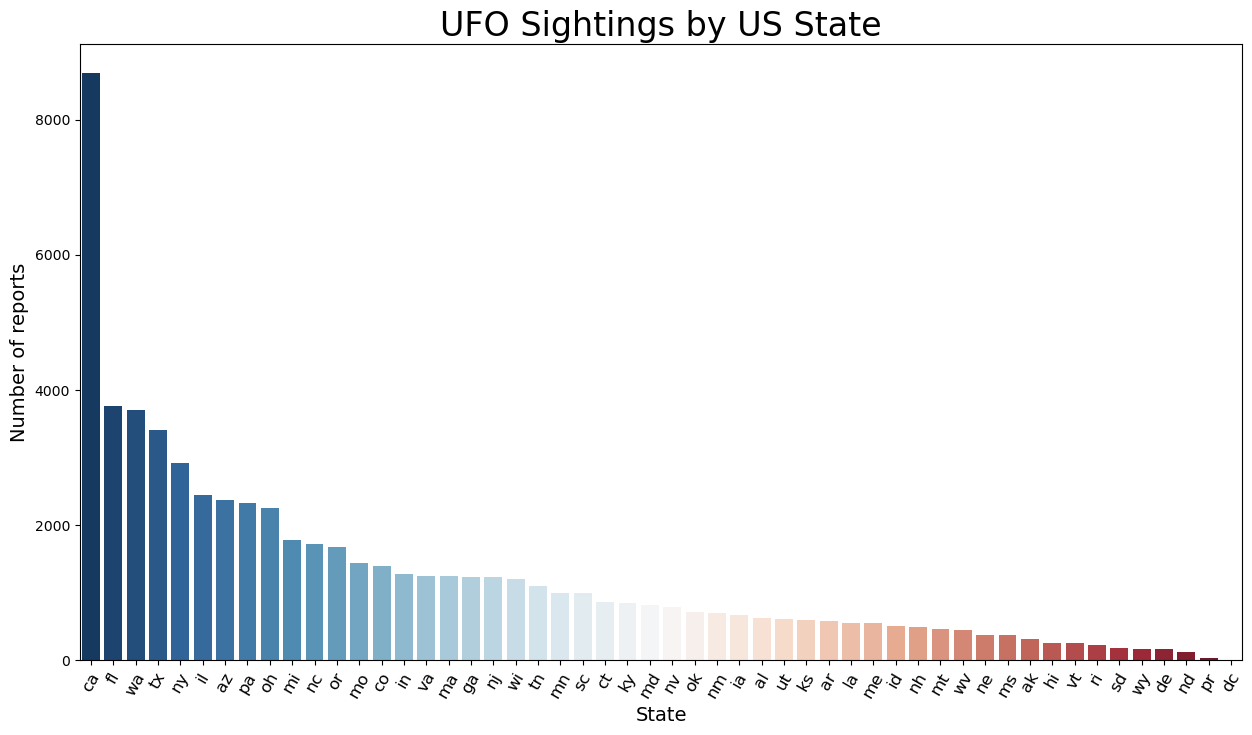

In [29]:
usa_stats = (ufo['country']=='us')
usdf = ufo[usa_stats]

state_stats = usdf.state.value_counts()
state_index = state_stats.index 
state_values = state_stats.values
plt.figure(figsize=(15,8))
plt.title('UFO Sightings by US State', fontsize=24)
plt.xlabel("State", fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
plt.xticks(rotation = 60, size=12)
state_plot = sns.barplot(x=state_index[:60],y=state_values[:60], palette='RdBu_r')

In [31]:
import plotly.offline as py
import plotly.graph_objs as go

m_cts = (ufo['datetime'].dt.month.value_counts()).sort_index()
m_ctsx = m_cts.index
m_ctsy = m_cts.values




# Convert the bar chart to Plotly format
month_fig = go.Figure(data=[go.Bar(x=m_ctsx, y=m_ctsy, marker=dict(color='rgb(255, 127, 14)'))])
month_fig.update_layout(
    title='Global UFO Sightings by Month',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Sightings'),
    showlegend=False
)

# Render the Plotly figure in Jupyter notebook
py.init_notebook_mode(connected=True)
py.iplot(month_fig)

Conclusion:
-what is the most common ufo shape? Light
-number of sightings over the years? over 7000 in the 2000+  
-number of sights per country? US have the most
-number of of sights per state? California have the most
-what is the most popular time to see a UFO? July